# Prism Data

In [1]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import re

In [2]:
inflows = pd.read_parquet('/uss/hdsi-prismdata/q1-ucsd-inflows.pqt')

In [3]:
outflows = pd.read_parquet('/uss/hdsi-prismdata/q1-ucsd-outflows.pqt')

In [4]:
inflows.head(5)

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category
0,0,acc_0,PAYCHECK,2477.02,2022-03-18,PAYCHECK
1,0,acc_0,EXTERNAL_TRANSFER,100.00,2022-10-25,EXTERNAL_TRANSFER
2,0,acc_0,MISCELLANEOUS,6.29,2022-08-26,MISCELLANEOUS
3,0,acc_0,EXTERNAL_TRANSFER,277.00,2022-06-03,EXTERNAL_TRANSFER
4,0,acc_0,EXTERNAL_TRANSFER,100.00,2022-07-29,EXTERNAL_TRANSFER


In [5]:
outflows.head(5)

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category
0,0,acc_0,LOAN,900.60,2022-07-05,LOAN
1,0,acc_0,ATM_CASH,80.00,2022-03-25,ATM_CASH
2,0,acc_0,TST* Casa Del Rio - Exp Fairlawn OH 09/24,18.42,2022-09-26,FOOD_AND_BEVERAGES
3,0,acc_0,LOAN,634.00,2023-01-10,LOAN
4,0,acc_0,Buffalo Wild Wings,26.47,2022-09-12,FOOD_AND_BEVERAGES


## Data Exploration

*inflows*

In [6]:
inflows['prism_consumer_id'].nunique()

2974

In [7]:
inflows['memo'].value_counts()

memo
EXTERNAL_TRANSFER        156533
SELF_TRANSFER            110437
DEPOSIT                   61345
MISCELLANEOUS             55648
PAYCHECK                  33138
PAYCHECK_PLACEHOLDER      26087
REFUND                    23220
INVESTMENT_INCOME         17325
SMALL_DOLLAR_ADVANCE      13621
OTHER_BENEFITS             7708
TAX                        3405
LOAN                       2513
UNEMPLOYMENT_BENEFITS      1961
INSURANCE                   174
Name: count, dtype: int64

In [8]:
inflows[inflows['memo'] == inflows['category']]

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category
0,0,acc_0,PAYCHECK,2477.02,2022-03-18,PAYCHECK
1,0,acc_0,EXTERNAL_TRANSFER,100.00,2022-10-25,EXTERNAL_TRANSFER
2,0,acc_0,MISCELLANEOUS,6.29,2022-08-26,MISCELLANEOUS
3,0,acc_0,EXTERNAL_TRANSFER,277.00,2022-06-03,EXTERNAL_TRANSFER
4,0,acc_0,EXTERNAL_TRANSFER,100.00,2022-07-29,EXTERNAL_TRANSFER
...,...,...,...,...,...,...
513110,5941,acc_9524,EXTERNAL_TRANSFER,8.66,2023-01-21,EXTERNAL_TRANSFER
513111,5941,acc_9524,EXTERNAL_TRANSFER,267.13,2023-01-23,EXTERNAL_TRANSFER
513112,5941,acc_9524,EXTERNAL_TRANSFER,2.00,2023-01-24,EXTERNAL_TRANSFER
513113,5941,acc_9524,EXTERNAL_TRANSFER,207.16,2023-01-24,EXTERNAL_TRANSFER


In [9]:
len(inflows)

513115

In [10]:
inflows['memo'].nunique()

14

In [11]:

inflows['category'].nunique()

14

**Number of unique merchants in each category**

In [12]:
 inflows[['category','memo']].groupby('category').nunique()

,memo
category,
DEPOSIT,1
EXTERNAL_TRANSFER,1
INSURANCE,1
INVESTMENT_INCOME,1
LOAN,1
MISCELLANEOUS,1
OTHER_BENEFITS,1
PAYCHECK,1
PAYCHECK_PLACEHOLDER,1


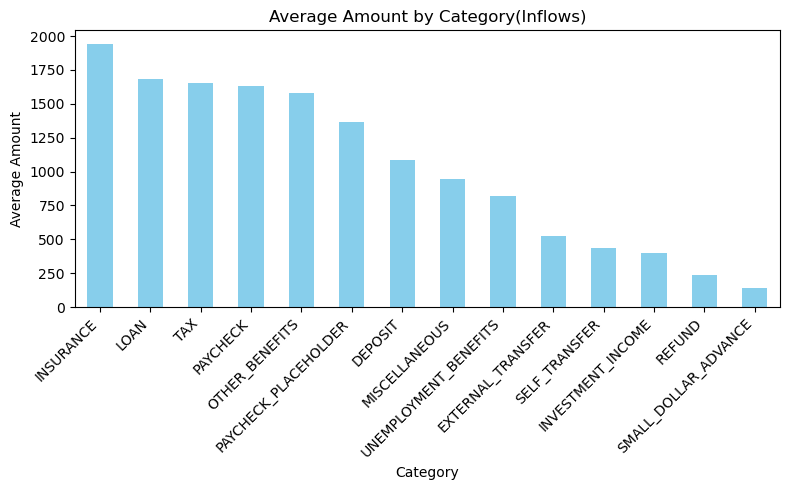

In [13]:
import matplotlib.pyplot as plt

avg_by_category = inflows.groupby('category')['amount'].mean().sort_values(ascending=False)


avg_by_category.plot(kind='bar', color='skyblue', figsize=(8,5))

plt.title('Average Amount by Category(Inflows)')
plt.xlabel('Category')
plt.ylabel('Average Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

*outflows*

In [14]:
outflows['memo'].value_counts()

memo
EXTERNAL_TRANSFER                                                                    320998
AUTOMOTIVE                                                                           208579
ATM_CASH                                                                             117651
UNCATEGORIZED                                                                        117409
LOAN                                                                                  90945
                                                                                      ...  
Par Gators Dockside -                                                                     1
Chilis Mandarin                                                                           1
Chilis Bay Meadows                                                                        1
Southside Liquor                                                                          1
POS WITHDRAWALWAL-MART #XXXX XXXX E MCKELLIPS RD MESA AZ  Card 15 #XXXX  MC

In [15]:
list(outflows['category'].unique())

['LOAN',
 'ATM_CASH',
 'FOOD_AND_BEVERAGES',
 'ENTERTAINMENT',
 'GENERAL_MERCHANDISE',
 'ESSENTIAL_SERVICES',
 'GROCERIES',
 'EXTERNAL_TRANSFER',
 'AUTOMOTIVE',
 'UNCATEGORIZED',
 'CREDIT_CARD_PAYMENT',
 'SELF_TRANSFER',
 'PETS',
 'HEALTHCARE_MEDICAL',
 'INSURANCE',
 'ACCOUNT_FEES',
 'HOME_IMPROVEMENT',
 'TRAVEL',
 'MORTGAGE',
 'OVERDRAFT',
 'EDUCATION',
 'RENT',
 'TAX',
 'CHILD_DEPENDENTS',
 'GIFTS_DONATIONS',
 'BILLS_UTILITIES',
 'PAYCHECK',
 'BNPL',
 'AUTO_LOAN']

In [16]:
outflows[outflows['category'] == 'BILLS_UTILITIES']['memo'].unique()

array(['BILLS_UTILITIES'], dtype=object)

**Uncategorized Category**

In [17]:
outflows[outflows['category'] == 'UNCATEGORIZED']

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category
27,0,acc_0,UNCATEGORIZED,310.64,2022-02-22,UNCATEGORIZED
65,0,acc_0,UNCATEGORIZED,150.00,2022-03-11,UNCATEGORIZED
75,0,acc_0,UNCATEGORIZED,2.20,2022-08-01,UNCATEGORIZED
84,0,acc_0,UNCATEGORIZED,405.65,2022-03-29,UNCATEGORIZED
119,0,acc_0,UNCATEGORIZED,547.84,2022-08-23,UNCATEGORIZED
...,...,...,...,...,...,...
2597446,5941,acc_9524,UNCATEGORIZED,251.51,2023-01-13,UNCATEGORIZED
2597463,5941,acc_9524,UNCATEGORIZED,804.27,2023-01-18,UNCATEGORIZED
2597467,5941,acc_9524,UNCATEGORIZED,39.64,2023-01-19,UNCATEGORIZED
2597472,5941,acc_9524,UNCATEGORIZED,0.00,2023-01-20,UNCATEGORIZED


In [18]:
outflows[['category','memo']].groupby('category').nunique()

,memo
category,
ACCOUNT_FEES,1
ATM_CASH,1
AUTOMOTIVE,1
AUTO_LOAN,1
BILLS_UTILITIES,1
BNPL,1
CHILD_DEPENDENTS,1
CREDIT_CARD_PAYMENT,1
EDUCATION,2122


In [19]:
outflows['memo'].value_counts()

memo
EXTERNAL_TRANSFER                                                                    320998
AUTOMOTIVE                                                                           208579
ATM_CASH                                                                             117651
UNCATEGORIZED                                                                        117409
LOAN                                                                                  90945
                                                                                      ...  
Par Gators Dockside -                                                                     1
Chilis Mandarin                                                                           1
Chilis Bay Meadows                                                                        1
Southside Liquor                                                                          1
POS WITHDRAWALWAL-MART #XXXX XXXX E MCKELLIPS RD MESA AZ  Card 15 #XXXX  MC

In [20]:
list(outflows['category'].unique())

['LOAN',
 'ATM_CASH',
 'FOOD_AND_BEVERAGES',
 'ENTERTAINMENT',
 'GENERAL_MERCHANDISE',
 'ESSENTIAL_SERVICES',
 'GROCERIES',
 'EXTERNAL_TRANSFER',
 'AUTOMOTIVE',
 'UNCATEGORIZED',
 'CREDIT_CARD_PAYMENT',
 'SELF_TRANSFER',
 'PETS',
 'HEALTHCARE_MEDICAL',
 'INSURANCE',
 'ACCOUNT_FEES',
 'HOME_IMPROVEMENT',
 'TRAVEL',
 'MORTGAGE',
 'OVERDRAFT',
 'EDUCATION',
 'RENT',
 'TAX',
 'CHILD_DEPENDENTS',
 'GIFTS_DONATIONS',
 'BILLS_UTILITIES',
 'PAYCHECK',
 'BNPL',
 'AUTO_LOAN']

In [21]:

outflows[outflows['category'] == 'BILLS_UTILITIES']['memo'].unique()

array(['BILLS_UTILITIES'], dtype=object)

**Uncategorized Transactions**

In [22]:

outflows[outflows['category'] == 'UNCATEGORIZED']

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category
27,0,acc_0,UNCATEGORIZED,310.64,2022-02-22,UNCATEGORIZED
65,0,acc_0,UNCATEGORIZED,150.00,2022-03-11,UNCATEGORIZED
75,0,acc_0,UNCATEGORIZED,2.20,2022-08-01,UNCATEGORIZED
84,0,acc_0,UNCATEGORIZED,405.65,2022-03-29,UNCATEGORIZED
119,0,acc_0,UNCATEGORIZED,547.84,2022-08-23,UNCATEGORIZED
...,...,...,...,...,...,...
2597446,5941,acc_9524,UNCATEGORIZED,251.51,2023-01-13,UNCATEGORIZED
2597463,5941,acc_9524,UNCATEGORIZED,804.27,2023-01-18,UNCATEGORIZED
2597467,5941,acc_9524,UNCATEGORIZED,39.64,2023-01-19,UNCATEGORIZED
2597472,5941,acc_9524,UNCATEGORIZED,0.00,2023-01-20,UNCATEGORIZED


In [23]:
outflows[['category','memo']].groupby('category').nunique()

,memo
category,
ACCOUNT_FEES,1
ATM_CASH,1
AUTOMOTIVE,1
AUTO_LOAN,1
BILLS_UTILITIES,1
BNPL,1
CHILD_DEPENDENTS,1
CREDIT_CARD_PAYMENT,1
EDUCATION,2122


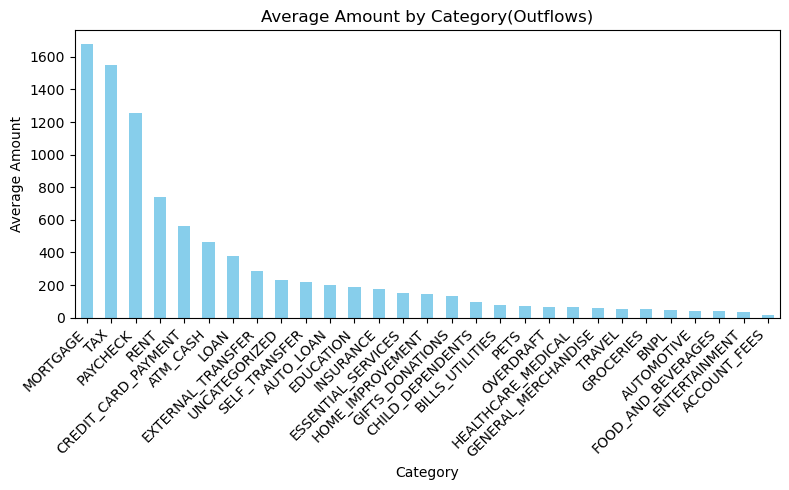

In [24]:
import matplotlib.pyplot as plt

avg_by_category = outflows.groupby('category')['amount'].mean().sort_values(ascending=False)


avg_by_category.plot(kind='bar', color='skyblue', figsize=(8,5))

plt.title('Average Amount by Category(Outflows)')
plt.xlabel('Category')
plt.ylabel('Average Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [25]:
# double checking 

# outflows[outflows['category']=='TAX']

In [26]:
merchant_cat = ['EDUCATION', 'FOOD_AND_BEVERAGES', 'GENERAL_MERCHANDISE', 'GROCERIES', 'MORTGAGE','OVERDRAFT', 'PETS', 'RENT', 'TRAVEL']

In [27]:
merchant_df = outflows[outflows['category'].isin(merchant_cat)][['category','memo']].reset_index()
merchant_df

,index,category,memo
0,2,FOOD_AND_BEVERAGES,TST* Casa Del Rio - Exp Fairlawn OH 09/24
1,4,FOOD_AND_BEVERAGES,Buffalo Wild Wings
2,6,GENERAL_MERCHANDISE,Oculus CA 04/16
3,7,FOOD_AND_BEVERAGES,LOS GIRASOLES STOW OH 03/08
4,8,GENERAL_MERCHANDISE,BUZZIS LAUNDRY 1 OH 03/28
...,...,...,...
1306447,2597457,GENERAL_MERCHANDISE,DEBIT CARD WITHDRAWAL PURCHASEAmazon Prime*TI4...
1306448,2597462,EDUCATION,POS WITHDRAWALAZ LOT QUIKTRIP XXXX XXXX E INDI...
1306449,2597465,FOOD_AND_BEVERAGES,POS WITHDRAWALWAL-MART #XXXX XXXX E MCKELLIPS ...
1306450,2597468,FOOD_AND_BEVERAGES,WITHDRAWAL Salt River ProjeTYPE: ONLINE PMT CO...


In [28]:
merchant_df.groupby(['category','memo']).count().sort_values(by=['category','index'], ascending=False).groupby('category').head(3)

index
category            memo                                                     
TRAVEL              Uber                                                 7989
                    Uber Eats                                            5691
                    Lyft                                                 4648
RENT                SOUTHERN INVESTO WEB PMTS                              47
                    NEWREZ-SHELLPOIN WEB PMTS XXXXXXXXXX WEB ID: XX...     37
                    CHECKCARD XXXX GRACELAND RENTAL XXX-XXXXXXX KY ...     30
PETS                PetSmart                                             1450
                    CHEWY.COM                                             255
                    Pet Supplies Plus                                     228
OVERDRAFT           Overdraft Item Fee                                    374
                    OVERDRAFT ITEM CHARGE                                 191
                    OVERDRAFT PROTECTION TO XXXXXXXXXXXXXX                180
MORTGAGE            HUNTINGTON MORTG ONLINE PMT XXXXXX                     52
                    FREEDOM MTG PYMTS                                      45
                    WELLS FARGO HOME MORTGAGE Bill Payment                 35
GROCERIES           Walmart                                             31619
                    Kroger                                               8423
                    Target                                               8343
GENERAL_MERCHANDISE Amazon                                              31725
                    7-Eleven                                            11675
                    Circle K                                            10148
FOOD_AND_BEVERAGES  McDonald's                                          22670
                    Starbucks                                           12777
                    Chick-fil-A                                          7933
EDUCATION           Teacherspayteachers.com                                90
                    CHECKCARD XXXX BETMGM PLAY+ LAS VEGAS NV XXXXXX...     82
                    Mms University Of Maryl                                59

## Chosen Categories(5)

- **FOOD_AND_BEVERAGES**
- **GENERAL_MERCHANDISE**
- **GROCERIES**
- **PETS**
- **TRAVEL**

In [29]:
chosen_cat = ['FOOD_AND_BEVERAGES', 'GENERAL_MERCHANDISE', 'GROCERIES', 'PETS', 'TRAVEL']

In [30]:
chosen_df = outflows[outflows['category'].isin(chosen_cat)][['category','memo']].reset_index()
chosen_df.groupby(['category','memo']).count().sort_values(by=['category','index'], ascending=False).groupby('category').head(3)

index
category            memo                    
TRAVEL              Uber                7989
                    Uber Eats           5691
                    Lyft                4648
PETS                PetSmart            1450
                    CHEWY.COM            255
                    Pet Supplies Plus    228
GROCERIES           Walmart            31619
                    Kroger              8423
                    Target              8343
GENERAL_MERCHANDISE Amazon             31725
                    7-Eleven           11675
                    Circle K           10148
FOOD_AND_BEVERAGES  McDonald's         22670
                    Starbucks          12777
                    Chick-fil-A         7933

In [31]:
import pandas as pd

filtered_df = outflows[outflows['category'].isin(chosen_cat)]


avg_per_category = filtered_df.groupby('category')['amount'].mean()


highest_avg_category = avg_per_category.idxmax()
highest_avg_amount = avg_per_category.max()

print(f"Category with highest average amount: {highest_avg_category}")
print(f"Average amount: {highest_avg_amount:.2f}")

print("\nAverage amount per category:")
print(avg_per_category)


Category with highest average amount: PETS
Average amount: 72.11

Average amount per category:
category
FOOD_AND_BEVERAGES     40.564988
GENERAL_MERCHANDISE    57.821981
GROCERIES              51.450581
PETS                   72.111759
TRAVEL                 55.842056
Name: amount, dtype: float64


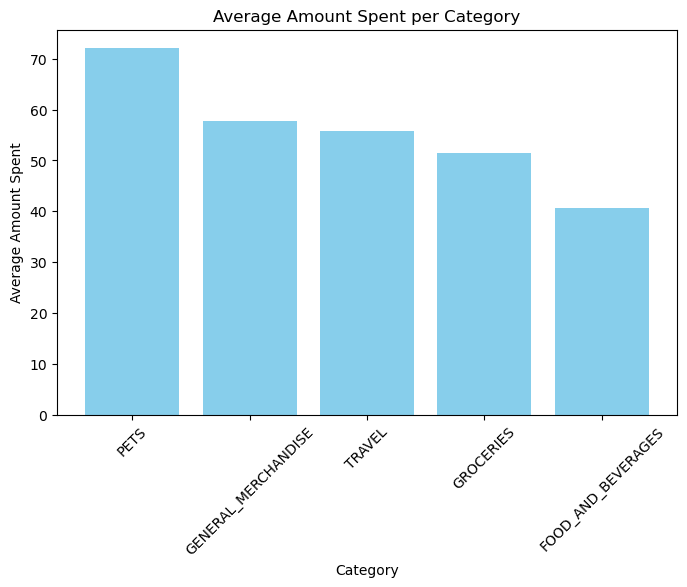

In [32]:
import matplotlib.pyplot as plt

avg_per_category = filtered_df.groupby('category')['amount'].mean()


avg_per_category_sorted = avg_per_category.sort_values(ascending=False)

plt.figure(figsize=(8,5))
plt.bar(avg_per_category_sorted.index, avg_per_category_sorted.values, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Average Amount Spent')
plt.title('Average Amount Spent per Category')
plt.xticks(rotation=45)
plt.show()


 ***Most Common Merchants by Category (Top 3)***


- **`TRAVEL`** :`Uber, Uber Eats, Lyft`
-  **`PETS`**  : `PetSmart, CHEWY.COM, Pet Supplies Plus`
- **`GROCERIES`** : `Walmart, Kroger, Target`
- **`GENERAL_MERCHANDISE`**: `Amazon, 7-Eleven, Circle K`
- **`FOOD_AND_BEVERAGES`** : `McDonald's, Starbucks, Chick-fil-a`

## Train-Test Split 

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
inflows

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category
0,0,acc_0,PAYCHECK,2477.02,2022-03-18,PAYCHECK
1,0,acc_0,EXTERNAL_TRANSFER,100.00,2022-10-25,EXTERNAL_TRANSFER
2,0,acc_0,MISCELLANEOUS,6.29,2022-08-26,MISCELLANEOUS
3,0,acc_0,EXTERNAL_TRANSFER,277.00,2022-06-03,EXTERNAL_TRANSFER
4,0,acc_0,EXTERNAL_TRANSFER,100.00,2022-07-29,EXTERNAL_TRANSFER
...,...,...,...,...,...,...
513110,5941,acc_9524,EXTERNAL_TRANSFER,8.66,2023-01-21,EXTERNAL_TRANSFER
513111,5941,acc_9524,EXTERNAL_TRANSFER,267.13,2023-01-23,EXTERNAL_TRANSFER
513112,5941,acc_9524,EXTERNAL_TRANSFER,2.00,2023-01-24,EXTERNAL_TRANSFER
513113,5941,acc_9524,EXTERNAL_TRANSFER,207.16,2023-01-24,EXTERNAL_TRANSFER


In [35]:
inflows_consumers = inflows['prism_consumer_id'].unique()
inflows_consumers

array([   0,    2,    4, ..., 5939, 5940, 5941])

In [36]:
in_train_users, in_test_users = train_test_split(inflows_consumers, test_size=0.2)#, random_state=42)
len(in_train_users), len(in_test_users)

(2379, 595)

In [37]:
595/2379

0.25010508617065996

In [38]:
in_train_df = inflows[inflows['prism_consumer_id'].isin(in_train_users)]
in_test_df = inflows[inflows['prism_consumer_id'].isin(in_test_users)]

In [39]:
in_train_df

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category
0,0,acc_0,PAYCHECK,2477.02,2022-03-18,PAYCHECK
1,0,acc_0,EXTERNAL_TRANSFER,100.00,2022-10-25,EXTERNAL_TRANSFER
2,0,acc_0,MISCELLANEOUS,6.29,2022-08-26,MISCELLANEOUS
3,0,acc_0,EXTERNAL_TRANSFER,277.00,2022-06-03,EXTERNAL_TRANSFER
4,0,acc_0,EXTERNAL_TRANSFER,100.00,2022-07-29,EXTERNAL_TRANSFER
...,...,...,...,...,...,...
513110,5941,acc_9524,EXTERNAL_TRANSFER,8.66,2023-01-21,EXTERNAL_TRANSFER
513111,5941,acc_9524,EXTERNAL_TRANSFER,267.13,2023-01-23,EXTERNAL_TRANSFER
513112,5941,acc_9524,EXTERNAL_TRANSFER,2.00,2023-01-24,EXTERNAL_TRANSFER
513113,5941,acc_9524,EXTERNAL_TRANSFER,207.16,2023-01-24,EXTERNAL_TRANSFER


In [40]:

in_test_df

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category
204,4,acc_5,PAYCHECK,8221.32,2022-02-25,PAYCHECK
205,4,acc_5,SELF_TRANSFER,5000.00,2022-07-07,SELF_TRANSFER
206,4,acc_5,PAYCHECK,8622.49,2022-08-25,PAYCHECK
207,4,acc_5,PAYCHECK,5988.29,2022-11-25,PAYCHECK
208,4,acc_5,INVESTMENT_INCOME,0.05,2022-11-09,INVESTMENT_INCOME
...,...,...,...,...,...,...
512373,5939,acc_9522,DEPOSIT,512.00,2022-12-05,DEPOSIT
512374,5939,acc_9522,REFUND,107.35,2022-12-13,REFUND
512375,5939,acc_9522,DEPOSIT,576.00,2023-01-03,DEPOSIT
512376,5939,acc_9522,DEPOSIT,95.34,2023-01-18,DEPOSIT


In [41]:
len(in_train_df), len(in_test_df)

(410261, 102854)

In [42]:
99026/414089

0.2391418269985438

In [43]:
in_train_df.groupby('prism_consumer_id').size().mean(), in_test_df.groupby('prism_consumer_id').size().mean()

(172.45102984447246, 172.86386554621848)

In [44]:
in_train_df['amount'].mean(), in_test_df['amount'].mean()

(726.2983575090002, 768.2112576078713)

In [45]:

in_train_df['amount'].median(), in_test_df['amount'].median()

(100.0, 100.0)


*outflows*

In [46]:
outflows_consumers = outflows['prism_consumer_id'].unique()
outflows_consumers 


array([   0,    2,    4, ..., 5939, 5940, 5941])

In [47]:
out_train_users, out_test_users = train_test_split(outflows_consumers, test_size=0.2, random_state=42)
len(out_train_users), len(out_test_users)

(2374, 594)

In [48]:
594/2374

0.2502106149957877

In [49]:
out_train_df = outflows[outflows['prism_consumer_id'].isin(out_train_users)]
out_test_df = outflows[outflows['prism_consumer_id'].isin(out_test_users)]
len(out_train_df), len(out_test_df)


(2097805, 499683)

In [50]:
len(out_test_df)/len(out_train_df)

0.23819325437779013

In [51]:
out_train_df.groupby('prism_consumer_id').size().mean(), out_test_df.groupby('prism_consumer_id').size().mean()


(883.6583824768323, 841.2171717171717)

In [52]:
out_train_df['amount'].mean(), out_test_df['amount'].mean()

(138.0927030586732, 174.65576219323057)

In [53]:
results = []

for i in range(10):
    consumers = outflows['prism_consumer_id'].unique()
    train_consumers, test_consumers = train_test_split(consumers, test_size=0.2, random_state=i)

    # create train/test
    out_train_df = outflows[outflows['prism_consumer_id'].isin(train_consumers)]
    out_test_df = outflows[outflows['prism_consumer_id'].isin(test_consumers)]

    train_mean = out_train_df['amount'].mean()
    test_mean = out_test_df['amount'].mean()
    
    results.append({
        'run': i+1,
        'train_mean': train_mean,
        'test_mean': test_mean,
        'test_greater_than_train': test_mean > train_mean
    })
results_df = pd.DataFrame(results)
print("test mean > train mean:", results_df['test_greater_than_train'].sum())

results_df

test mean > train mean: 5


,run,train_mean,test_mean,test_greater_than_train
0,1,143.084348,153.033872,True
1,2,145.634828,143.093660,False
2,3,148.333782,132.006570,False
3,4,135.336009,189.045829,True
4,5,146.713798,138.832393,False
5,6,141.546613,159.400710,True
6,7,145.845616,142.237054,False
7,8,148.314072,132.605315,False
8,9,138.849937,168.705635,True
9,10,141.326526,160.931030,True


**We split the data at the consumer level so that all transactions from a single consumer are placed entirely in either the training or test set.**

**The train and test splits appear to be unbiased. In 10 random runs, the test mean was greater than the train mean 5 times, which is roughly half. This indicates that both splits likely represent the same underlying data distribution.**

### Memo Cleaning

In [54]:
# out_train_df['memo'].head(50)

credit, debit, withdrawal, recurring, point, of, sale, txn, trxn, crd, pur

- kept in `in`

In [55]:
import re

def clean_memo(text: str) -> str:
    if pd.isna(text):
        return text

    text = text.strip().lower()

    # remove email addresses
    text = re.sub(r'\b([\w\._-]+)@[\w\.-]+\b', r'\1', text)

    # remove tst
    text = re.sub(r'\btst\*', '', text)

    # remove ref/conf/id/payment etc.
    text = re.sub(r'\b(?:ref|conf|id|paymntid|pmt info|payment id|web id|bnf)[#:\s=]*\w*', '', text)

    # remove long X sequences
    text = re.sub(r'x{2,}[a-z0-9]*', '', text)

    # remove dates
    text = re.sub(r'\b\d{1,2}/\d{1,2}(?:/\d{2,4})?\b', '', text)

    # remove 2-letter state abbreviations
    text = re.sub(
        r'\b(?:al|ak|az|ar|ca|co|ct|de|fl|ga|hi|id|il|in|ia|ks|ky|la|me|md|ma|mi|mn|ms|mo|mt|ne|nv|nh|nj|nm|ny|nc|nd|oh|ok|or|pa|ri|sc|sd|tn|tx|ut|vt|va|wa|wv|wi|wy|dc)\b',
        '', text)
    # fix this to not bound it in b; remove only when appear as a regex 

    # remove alphanumeric ids (letters + numbers that are more than 4 chars)
    text = re.sub(r'\b(?=\w*[a-z])(?=\w*\d)[a-z0-9]{4,}\b', '', text)

    # remove street suffixes
    text = re.sub(r'\b(?:st|rd|ave|blvd|pkwy|plz)\b', '', text)

    # remove only the prefixes 'www' or 'https' but keep domain (do we want to remove domain too?)
    text = re.sub(r'\b(?:https?:\/\/|https?\.|www\.)', '', text)

    # remove unwanted words/phrases
    text = re.sub(r'\bpurchase authorized on\b', '', text)
    text = re.sub(r'\b(authorized|payment)\b', '', text)

    # fix wendy’s → wendys
    text = re.sub(r"’|'|`", '', text)

    # add space after certain words if stuck
    text = re.sub(r'(grubhub|doordash)(\w)', r'\1 \2', text)
    text = re.sub(r'purchaseamazon', 'purchase amazon', text)

    # remove dd if followed by doordash
    text = re.sub(r'\bdd doordash\b', 'doordash', text)

    # replacements / normalization
    replacements = {
        'bk': 'bank',
        'wal-mart': 'walmart',
        'wal mart': 'walmart',
        'business to business': 'b2b',
        'pypl': 'paypal',
        'amzn': 'amazon',
        'burgerkin': 'burger king'
    }
    for k, v in replacements.items():
        text = re.sub(rf'\b{k}\b', v, text)

    # remove company suffixes
    text = re.sub(r'\b(?:llc|corp|co|inc)\b', '', text)

    # normalize punctuation
    text = re.sub(r'[_/]', ' ', text)
    text = re.sub(r'(?<!\w)-(?!\w)', ' ', text)
    text = re.sub(r"[!@#$%^&*+=?:;\"',.<>~`|\\]+", ' ', text)

    # collapse duplicate words
    text = re.sub(r'\b(\w+)( \1\b)+', r'\1', text)

    # normalize spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text



In [56]:
# test runs
df = pd.DataFrame({
    "memo": [
        "TST* Casa Del Rio - Exp Fairlawn OH 9/24",
        "APPLE.COM/BILL CA 04/07",
        "payment to user@email.com REF#12345",
        "Zelle payment from john_doe@email.com 06/12",
        "TGI FRIDAYS XXXX STOW OH 12/31",
        "LOS GIRASOLES STOW OH 03/08",
        "www.elliewang.com",
        "https.elliewang.com",
        "doordash doordash dashmart",
        "wal mart",
        "chick-fil-a",
        "Chick-fiwoodstock",
        "purchase authorized on june",
        "dd doordash",
        "doordashhellofresh",
        "wendy's",
        "purchase authorized on amazon",
        "2kjhfskjd234987dkjghkhf98734",
        "monsters inc"
    ]
})

df["cleaned_memo"] = df["memo"].apply(clean_memo)
print(df)

                                           memo               cleaned_memo
0      TST* Casa Del Rio - Exp Fairlawn OH 9/24  casa del rio exp fairlawn
1                       APPLE.COM/BILL CA 04/07             apple com bill
2           payment to user@email.com REF#12345                    to user
3   Zelle payment from john_doe@email.com 06/12        zelle from john doe
4                TGI FRIDAYS XXXX STOW OH 12/31           tgi fridays stow
5                   LOS GIRASOLES STOW OH 03/08         los girasoles stow
6                             www.elliewang.com              elliewang com
7                           https.elliewang.com              elliewang com
8                    doordash doordash dashmart          doordash dashmart
9                                      wal mart                    walmart
10                                  chick-fil-a                chick-fil-a
11                            Chick-fiwoodstock          chick-fiwoodstock
12                  purch

In [57]:
# out_train_df.loc[0:49, 'memo'].apply(clean_memo)


In [58]:
subset = out_train_df.sample(n=50, random_state=None).copy()
subset['cleaned_memo'] = subset['memo'].apply(clean_memo)
subset[['memo', 'cleaned_memo']]


,memo,cleaned_memo
1870319,PANERA BREAD #XXXXXX XXX-XXX-XXXX IL 1...,panera bread
1014354,ATM_CASH,atm cash
1347308,LOAN,loan
2297357,PURCHASE AUTHORIZED ON 08/22 DEL TACO XXXX HES...,del taco hesperia s card
1535974,EXTERNAL_TRANSFER,external transfer
2154550,POS Debit - Visa Check Card XXXX - AMAZON.COM*...,pos debit visa check card amazon com amazon com b
1346803,ENTERTAINMENT,entertainment
444151,CREDIT_CARD_PAYMENT,credit card payment
1787037,LOAN,loan
1943869,BEST BUY #247,best buy 247


In [59]:
mask = out_train_df['memo'].str.contains('dd', case=False, na=False)
out_train_df.loc[mask, 'memo'] = out_train_df.loc[mask, 'memo'].apply(clean_memo)
out_train_df.loc[mask, 'memo'].head(50)

149                                     doordash dashmart
263                                     doordash pizzahut
417                                    doordash lemongras
481                                    doordash timspizze
579                                    doordash cosmicwin
1275                            usps change of add s card
2152                           usps change of address usa
5521                  checkcard dnh godaddy com recurring
6720              checkcard dnh godaddy com gaz recurring
6880                                           amazon com
8467        online transfer to ting lui c savings uber to
8622            doordash cosmic 04-05 debit card purchase
8625            doordash papamu 06-13 debit card purchase
8670            doordash chipot 02-20 debit card purchase
8690            doordash potbel 05-03 debit card purchase
8720            doordash sweetd 02-11 debit card purchase
8780            doordash family 01-26 debit card purchase
8837          

### Cleaning Banking Transactional Memos

In [60]:
out_train_df

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category
0,0,acc_0,LOAN,900.60,2022-07-05,LOAN
1,0,acc_0,ATM_CASH,80.00,2022-03-25,ATM_CASH
2,0,acc_0,TST* Casa Del Rio - Exp Fairlawn OH 09/24,18.42,2022-09-26,FOOD_AND_BEVERAGES
3,0,acc_0,LOAN,634.00,2023-01-10,LOAN
4,0,acc_0,Buffalo Wild Wings,26.47,2022-09-12,FOOD_AND_BEVERAGES
...,...,...,...,...,...,...
2597483,5941,acc_9524,ATM_CASH,8.42,2023-01-25,ATM_CASH
2597484,5941,acc_9524,ATM_CASH,2.06,2023-01-25,ATM_CASH
2597485,5941,acc_9524,ATM_CASH,262.88,2023-01-25,ATM_CASH
2597486,5941,acc_9524,ATM_CASH,10.00,2023-01-25,ATM_CASH


In [61]:
test_snippet = out_train_df['memo'].iloc[:50]
test_snippet

0                                            LOAN
1                                        ATM_CASH
2       TST* Casa Del Rio - Exp Fairlawn OH 09/24
3                                            LOAN
4                              Buffalo Wild Wings
5                                   ENTERTAINMENT
6                                 Oculus CA 04/16
7                     LOS GIRASOLES STOW OH 03/08
8                       BUZZIS LAUNDRY 1 OH 03/28
9                       BUZZIS LAUNDRY 1 OH 02/13
10                                  ENTERTAINMENT
11                 TGI FRIDAYS XXXX STOW OH 12/31
12    TST* The Basement Sp Cuyahoga Fall OH 06/06
13                                         Lowe's
14                            PIADA - 39 OH 08/23
15                                        GrubHub
16                             ESSENTIAL_SERVICES
17                 HARDEES XXXXXXX AKRON OH 05/29
18    MARKET DI XXXX State Cuyahoga Fall OH 04/06
19             SWENSONS - MONTROSE AKRON OH 06/29


In [62]:
out_train_df[out_train_df['memo'].str.contains('')]['memo'].to_list()[0:5]

['LOAN',
 'ATM_CASH',
 'TST* Casa Del Rio - Exp Fairlawn OH 09/24',
 'LOAN',
 'Buffalo Wild Wings']

In [63]:
out_train_df[out_train_df['memo'].str.contains(r'[\u200B\u200C\u200D\u2060\uFEFF\u00A0\u180E]', regex=True)]['memo'].to_list()[0:5]

['DBT CRD XXXX\xa012/05/22 XXXXXXXX DUTCHBROS180 NAMPA \xa0ID C# XXXX',
 'DBT CRD XXXX\xa012/18/22 XXXXXXXX MCDONALD\xa0S FXXXXX NAMPA \xa0 ID C# XXXX',
 'POS DEB XXXX\xa012/24/22 XXXXXXXX\xa0FRED-MEYER #XXXX FRED MEY\xa0NAMPA ID Card#\xa0XXXX',
 'DBT CRD XXXX\xa011/17/22 XXXXXXXX MCDONALD\xa0S FXXXXX NAMPA \xa0 ID C# XXXX',
 'DBT CRD XXXX\xa012/23/22 XXXXXXXX SONIC\xa0DRIVE IN #XXXX NAMPA \xa0 ID C# XXXX']

In [64]:
def cleaning(series):
    series = series.str.lower() # CASE NORMALIZATION
    series = series.apply(lambda x: x.encode('utf-8', errors='ignore').decode('utf-8', errors='ignore')) # CONVERT INTO UTF-8 

    # REMOVE @ BUT EXTRACT THE EMAIL DOMAIN
    def extract_email_domain(text):
        def replacer(match):
            full_email = match.group(0)
            domain = full_email.split('@')[1]  # take part after '@'
            return domain
        return re.sub(r'[\w\.-]+@[\w\.-]+', replacer, text)
    series = series.apply(extract_email_domain)

    # REMOVE ALL . UNLESS IT'S IN A WEBSITE OR EMAIL DOMAIN (remove standalone dots - not part of word/num)
    series = series.str.replace(r'(?<!\w)\.(?!\w)', '', regex=True)

    # REMOVE ALL # AND CHARACTERS AFTER IT (likely numbers)
    series = series.str.replace(r'#.*', '', regex=True)

    # REMOVE ALL % (not useful)
    series = series.str.replace('%', '')

    # REMOVE * (usually follows TST, so we can just use that)
    series = series.str.replace('*', '')

    # REMOVE PARENTHESES
    series = series.str.replace(r'[()]', '', regex=True)

    # REMOVE / AND REPLACE WITH ' '- occurs most commonly in dates but doesn't provide much info to repaying loans
    series = series.str.replace(r'\b\d{1,2}/\d{1,2}(?:/\d{2,4})?\b', '', regex=True)
    series = series.str.replace('/', ' ', regex=True)

    # REPLACE & WITH 'AND' UNLESS IT APPEARS IN 'AT&T' OR 'H&M'
    def replace_ampersand(text):
        if 'h&m' not in text and 'at&t' not in text:
            return text.replace('&', 'and')
        return text
    series = series.apply(replace_ampersand)

    # REMOVE ALL APOSTROPHES
    series = series.str.replace("'", "")

    # REPLACE '_' WITH ' '
    series = series.str.replace('_', ' ')

    # REMOVE ALL $
    series = series.str.replace('$', '')

    # REMOVE ALL :
    series = series.str.replace(':', '')

    # remove standalone sequence of + digits surrounded by word boundaries
    # chose 4 because after removing dashes from dates, we end up with many unneeded 4-digit numbers
    series = series.replace(r'\b\d{4,}\b', '', regex=True) 

    # REMOVE XXXX IF THERE ARE 4+ Xs
    series = series.str.replace(r'x{4,}', '', regex=True)

    # REMOVE ALL DASHES UNLESS SURROUNDED BY ALPHANUMERIC TEXT (detects phone numbers, codes, some merchant names)
    series = series.str.replace(r'(?<!\w)-{1,}(?!\w)', '', regex=True)

    # REMOVE INVISIBLE/ZERO-WIDTH CHARACTERS
    # series = series.str.replace(r'[\u200B\u200C\u200D\u2060\uFEFF\u00A0\u180E]', ' ', regex=True)

    # SPECIAL CASE: DOORDASH
    series = series.str.replace(r'(?<=doordash)(?=[A-Za-z])', ' ', regex=True)

    # REMOVE REDUNDANT WHITESPACE
    series = series.replace(r'\s+', ' ', regex=True).str.strip()

    return series

In [65]:
cleaning(test_snippet).to_list()

['loan',
 'atm cash',
 'tst casa del rio exp fairlawn oh',
 'loan',
 'buffalo wild wings',
 'entertainment',
 'oculus ca',
 'los girasoles stow oh',
 'buzzis laundry 1 oh',
 'buzzis laundry 1 oh',
 'entertainment',
 'tgi fridays stow oh',
 'tst the basement sp cuyahoga fall oh',
 'lowes',
 'piada 39 oh',
 'grubhub',
 'essential services',
 'hardees akron oh',
 'market di state cuyahoga fall oh',
 'swensons montrose akron oh',
 'great clips',
 'external transfer',
 'apple.com bill ca',
 'automotive',
 'apple.com bill ca',
 'automotive',
 'apple.com bill ca',
 'uncategorized',
 'los girasoles stow oh',
 'wing warehouse cuyah cuyahoga fall oh',
 'winking lizard 30 ma oh',
 'entertainment',
 'external transfer',
 'longhorn steak cuyahoga fall oh',
 'on tap cuyahoga fa cuyahoga fall oh',
 'tst the basement sp cuyahoga fall oh',
 'great clips',
 'automotive',
 'oculus ca',
 'credit card payment',
 'automotive',
 'credit card payment',
 'home depot',
 'credit card payment',
 'lowes',
 'falls 

In [66]:
# cleaning(out_train_df[out_train_df['memo'].str.contains(r'[\u200B\u200C\u200D\u2060\uFEFF\u00A0\u180E]', regex=True)]['memo']).to_list()

In [67]:
# Test series
test_memos = pd.Series([
    "POS PURCHASE - STARBUCKS 04/25",               # normal purchase with dash and date
    "Payment to user@google.com",                   # email extraction
    "H&M Store #12345",                             # & and # handling
    "T.J.Maxx (0425)",                              # parentheses, dot handling
    "Transfer 1234-5678",                           # long digits and dash
    "ACH CREDIT PAYROLL 50%",                       # % removal
    "VENMO PAYMENT TO john.doe@venmo.com",          # email domain + dot
    "ATM WDL $200*",                                # asterisk removal
    "AT&T Bill Payment 09/23",                      # & preserved in AT&T
    "Online subscription: Netflix.com",             # dot in domain,
    " POS PURCHASE STARBUCKS 0425 ",
    "ACH CREDIT 12345678"
])

In [68]:
cleaning(test_memos).to_list()

['pos purchase starbucks',
 'payment to google.com',
 'h&m store',
 't.j.maxx',
 'transfer',
 'ach credit payroll 50',
 'venmo payment to venmo.com',
 'atm wdl 200',
 'at&t bill payment',
 'online subscription netflix.com',
 'pos purchase starbucks',
 'ach credit']

In [69]:
# EXAMPLE OF EXTRACTING EMAIL DOMAINS

def extract_email_domain(text):
    def replacer(match):
        full_email = match.group(0)
        domain = full_email.split('@')[1]  # take part after '@'
        return domain
    return re.sub(r'[\w\.-]+@[\w\.-]+', replacer, text)
     
extract_email_domain('happy-cat88@gmail.com')

'gmail.com'

In [70]:
def replace_ampersand(text):
    if 'h&m' not in text and 'at&t' not in text:
        return text.replace('&', 'and')
    return text
replace_ampersand('the cat & i')

'the cat and i'

In [71]:
out_train_df

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category
0,0,acc_0,LOAN,900.60,2022-07-05,LOAN
1,0,acc_0,ATM_CASH,80.00,2022-03-25,ATM_CASH
2,0,acc_0,TST* Casa Del Rio - Exp Fairlawn OH 09/24,18.42,2022-09-26,FOOD_AND_BEVERAGES
3,0,acc_0,LOAN,634.00,2023-01-10,LOAN
4,0,acc_0,Buffalo Wild Wings,26.47,2022-09-12,FOOD_AND_BEVERAGES
...,...,...,...,...,...,...
2597483,5941,acc_9524,ATM_CASH,8.42,2023-01-25,ATM_CASH
2597484,5941,acc_9524,ATM_CASH,2.06,2023-01-25,ATM_CASH
2597485,5941,acc_9524,ATM_CASH,262.88,2023-01-25,ATM_CASH
2597486,5941,acc_9524,ATM_CASH,10.00,2023-01-25,ATM_CASH


In [72]:
out_train_df['cleaned_memos'] = cleaning(out_train_df['memo'])
out_train_df

/tmp/ipykernel_497/3473200593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_train_df['cleaned_memos'] = cleaning(out_train_df['memo'])


,prism_consumer_id,prism_account_id,memo,amount,posted_date,category,cleaned_memos
0,0,acc_0,LOAN,900.60,2022-07-05,LOAN,loan
1,0,acc_0,ATM_CASH,80.00,2022-03-25,ATM_CASH,atm cash
2,0,acc_0,TST* Casa Del Rio - Exp Fairlawn OH 09/24,18.42,2022-09-26,FOOD_AND_BEVERAGES,tst casa del rio exp fairlawn oh
3,0,acc_0,LOAN,634.00,2023-01-10,LOAN,loan
4,0,acc_0,Buffalo Wild Wings,26.47,2022-09-12,FOOD_AND_BEVERAGES,buffalo wild wings
...,...,...,...,...,...,...,...
2597483,5941,acc_9524,ATM_CASH,8.42,2023-01-25,ATM_CASH,atm cash
2597484,5941,acc_9524,ATM_CASH,2.06,2023-01-25,ATM_CASH,atm cash
2597485,5941,acc_9524,ATM_CASH,262.88,2023-01-25,ATM_CASH,atm cash
2597486,5941,acc_9524,ATM_CASH,10.00,2023-01-25,ATM_CASH,atm cash


In [73]:
out_train_df[out_train_df['cleaned_memos'].str.contains('in-n-out')]['cleaned_memos']

79716      in-n-out burger
94326      in-n-out burger
94568      in-n-out burger
94605      in-n-out burger
94912      in-n-out burger
                ...       
2469319    in-n-out burger
2469338    in-n-out burger
2469373    in-n-out burger
2469497    in-n-out burger
2469681    in-n-out burger
Name: cleaned_memos, Length: 160, dtype: object

In [74]:
out_test_df['cleaned_memos'] = cleaning(out_test_df['memo'])
out_test_df

/tmp/ipykernel_497/1279791862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_test_df['cleaned_memos'] = cleaning(out_test_df['memo'])


,prism_consumer_id,prism_account_id,memo,amount,posted_date,category,cleaned_memos
4403,11,acc_26,AUTOMOTIVE,26.98,2022-03-28,AUTOMOTIVE,automotive
4404,11,acc_26,AUTOMOTIVE,27.17,2022-03-15,AUTOMOTIVE,automotive
4405,11,acc_26,DEBIT CARD PURCHASE XXXXXXXXX Amazon.com*166OI...,8.28,2022-04-04,GENERAL_MERCHANDISE,debit card purchase amazon.com166oi77d2 amzn.c...
4406,11,acc_26,McDonald's,11.21,2022-04-11,FOOD_AND_BEVERAGES,mcdonalds
4407,11,acc_26,Lowe's,155.60,2022-03-14,GENERAL_MERCHANDISE,lowes
...,...,...,...,...,...,...,...
2595708,5939,acc_9522,PURCHASE 01-27 CLKBANK*MoonReading XXX-XXX-XXX...,11.00,2023-01-27,GENERAL_MERCHANDISE,purchase 01-27 clkbankmoonreading xxx-xxx- id vnt
2595709,5939,acc_9522,PURCHASE 01-26 CASH APP*DIANA STIE XXXXXXXXXX ...,16.00,2023-01-27,GENERAL_MERCHANDISE,purchase 01-26 cash appdiana stie ca vnt
2595710,5939,acc_9522,PURCHASE 01-26 CASH APP*DIANA STIE XXXXXXXXXX ...,16.00,2023-01-27,GENERAL_MERCHANDISE,purchase 01-26 cash appdiana stie ca vnt
2595711,5939,acc_9522,ESSENTIAL_SERVICES,34.95,2023-01-30,ESSENTIAL_SERVICES,essential services


### Stats for Inflow Data

In [131]:
# imports
import plotly.express as px
import matplotlib.pyplot as plt

In [78]:
in_train_df.head()

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category
0,0,acc_0,PAYCHECK,2477.02,2022-03-18,PAYCHECK
1,0,acc_0,EXTERNAL_TRANSFER,100.00,2022-10-25,EXTERNAL_TRANSFER
2,0,acc_0,MISCELLANEOUS,6.29,2022-08-26,MISCELLANEOUS
3,0,acc_0,EXTERNAL_TRANSFER,277.00,2022-06-03,EXTERNAL_TRANSFER
4,0,acc_0,EXTERNAL_TRANSFER,100.00,2022-07-29,EXTERNAL_TRANSFER


In [80]:
# Total transactions per consumer
transact_per_cust = in_train_df.groupby('prism_consumer_id')['memo'].count()
transact_per_cust

prism_consumer_id
0        91
2       113
7       129
9       375
11       33
       ... 
5926     14
5927     63
5929     92
5940    440
5941    297
Name: memo, Length: 2379, dtype: int64

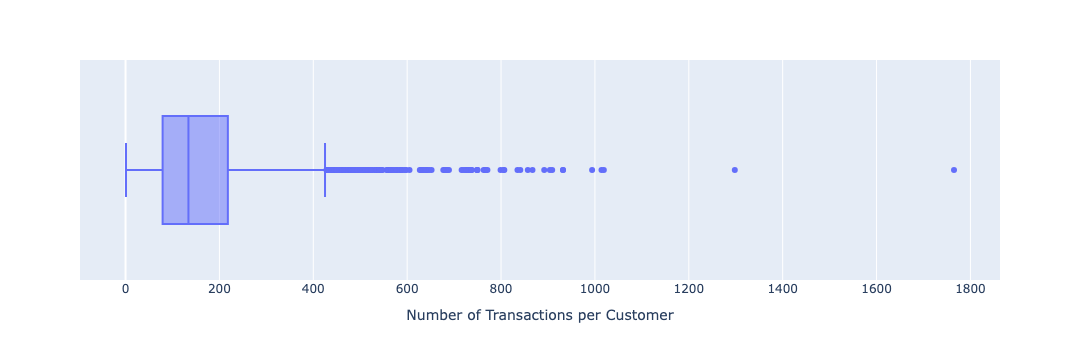

In [89]:
transact_per_cust_fig = px.box(x=transact_per_cust)
transact_per_cust_fig.update_layout(xaxis_title='Number of Transactions per Customer')
transact_per_cust_fig.show()

In [112]:
transact_per_cust.std()

149.01596632267956

In [115]:
transact_per_cust.quantile(0.75) - transact_per_cust.quantile(0.25) # IQR

139.0

In [141]:
# Total inflows by category - proportion of amounts
(in_train_df.groupby('category')['amount'].sum() / in_train_df['amount'].sum()).sort_values(ascending=False)

category
EXTERNAL_TRANSFER        0.208247
DEPOSIT                  0.179436
PAYCHECK                 0.146242
MISCELLANEOUS            0.136340
SELF_TRANSFER            0.129631
PAYCHECK_PLACEHOLDER     0.094626
OTHER_BENEFITS           0.033790
INVESTMENT_INCOME        0.019330
TAX                      0.015502
REFUND                   0.014895
LOAN                     0.011314
SMALL_DOLLAR_ADVANCE     0.005206
UNEMPLOYMENT_BENEFITS    0.004631
INSURANCE                0.000811
Name: amount, dtype: float64

In [142]:
in_train_df['category'].unique()

array(['PAYCHECK', 'EXTERNAL_TRANSFER', 'MISCELLANEOUS',
       'INVESTMENT_INCOME', 'TAX', 'DEPOSIT', 'SELF_TRANSFER', 'REFUND',
       'PAYCHECK_PLACEHOLDER', 'INSURANCE', 'OTHER_BENEFITS',
       'UNEMPLOYMENT_BENEFITS', 'LOAN', 'SMALL_DOLLAR_ADVANCE'],
      dtype=object)

What counts as income? 

1. **PAYCHECK** – Direct deposits from an employer for salary or wages.

2. ~~**EXTERNAL_TRANSFER** – Money coming from accounts at other banks or financial institutions.~~

3. ~~**MISCELLANEOUS** – Any income that doesn’t fit into other categories; small or irregular sources.~~

4. **INVESTMENT_INCOME** – Returns from investments such as dividends, interest, or capital gains.

5. ~~**TAX** – Refunds from tax authorities (like IRS or state tax refunds).~~

6. ~~**DEPOSIT** – General deposits, could include cash deposits, checks, or other unspecified inflows.~~

7. ~~**SELF_TRANSFER** – Moving money between your own accounts (e.g., from savings to checking).~~

8. ~~**REFUND** – Refunds from merchants for returned purchases or overpayments.~~

10. ~~**PAYCHECK_PLACEHOLDER** – Likely a system-generated placeholder for expected paychecks; may not be actual deposited funds.~~

11. **INSURANCE** – Payments from insurance claims or benefits (e.g., health, life, or property insurance payouts).

12. **OTHER_BENEFITS** – Miscellaneous benefits from employers or government (non-wage, non-tax-related).

13. **UNEMPLOYMENT_BENEFITS** – Payments from government unemployment insurance programs.

14. ~~**LOAN** – Funds received from loans or lines of credit.~~

15. ~~**SMALL_DOLLAR_ADVANCE** – Short-term small cash advances, often from payday-type loans or similar products.~~

After ignoring all the other sources of inflows that are not really "income", the three biggest contributors to income are:
1. paycheck
2. other benefits
3. investment income

In [98]:
# Total inflows by category - summed amounts
in_train_df.groupby('category')['amount'].sum().sort_values(ascending=False).map("{:,}".format)

category
EXTERNAL_TRANSFER        62,051,645.37
DEPOSIT                  53,466,769.01
PAYCHECK                 43,575,876.69
MISCELLANEOUS            40,625,573.45
SELF_TRANSFER            38,626,277.25
PAYCHECK_PLACEHOLDER     28,195,872.78
OTHER_BENEFITS           10,068,548.09
INVESTMENT_INCOME          5,759,861.1
TAX                       4,619,039.51
REFUND                    4,438,156.32
LOAN                      3,371,377.16
SMALL_DOLLAR_ADVANCE      1,551,357.21
UNEMPLOYMENT_BENEFITS     1,379,969.95
INSURANCE                   241,566.56
Name: amount, dtype: object

In [99]:
# Total inflows by category - number of transactions
in_train_df.groupby('category')['amount'].count().sort_values(ascending=False).map("{:,}".format)

category
EXTERNAL_TRANSFER        127,266
SELF_TRANSFER             85,937
DEPOSIT                   49,748
MISCELLANEOUS             45,208
PAYCHECK                  26,592
PAYCHECK_PLACEHOLDER      20,035
REFUND                    18,468
INVESTMENT_INCOME         13,898
SMALL_DOLLAR_ADVANCE      10,421
OTHER_BENEFITS             6,355
TAX                        2,719
LOAN                       1,955
UNEMPLOYMENT_BENEFITS      1,503
INSURANCE                    156
Name: amount, dtype: object

In [103]:
in_train_df['posted_date'] = pd.to_datetime(in_train_df['posted_date'])
in_train_df.dtypes

/tmp/ipykernel_497/3399730978.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



prism_consumer_id             int64
prism_account_id             object
memo                         object
amount                      float64
posted_date          datetime64[ns]
category                     object
dtype: object

In [106]:
# Inflow amount by month and year
in_train_df['year_month'] = in_train_df['posted_date'].dt.to_period('M').dt.to_timestamp()
sum_date = in_train_df.groupby('year_month')['amount'].sum().reset_index()
sum_date.head()

/tmp/ipykernel_497/6702046.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,year_month,amount
0,2017-12-01,6481.66
1,2018-01-01,46873.11
2,2018-02-01,100104.18
3,2018-03-01,62616.73
4,2018-04-01,56628.63


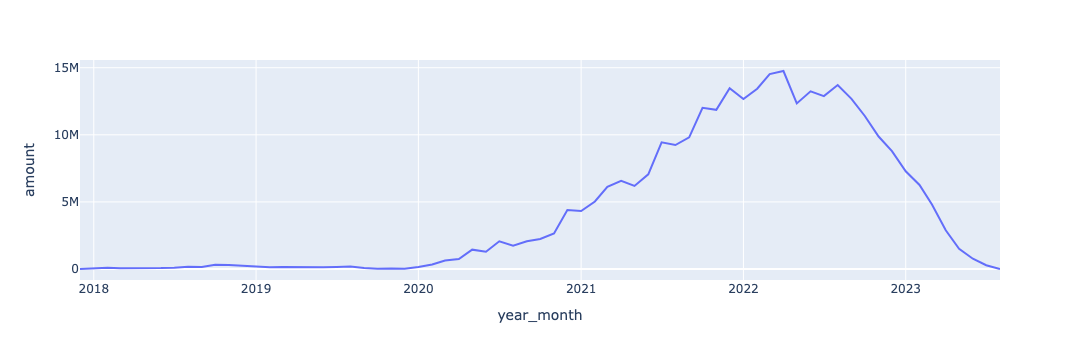

In [108]:
sum_date_fig = px.line(sum_date, x = 'year_month', y = 'amount')
sum_date_fig.show()

In [109]:
# Number of Inflow Transactions by Month and Year
count_date = in_train_df.groupby('year_month')['amount'].count().reset_index()
count_date.head()

,year_month,amount
0,2017-12-01,1
1,2018-01-01,15
2,2018-02-01,16
3,2018-03-01,14
4,2018-04-01,33


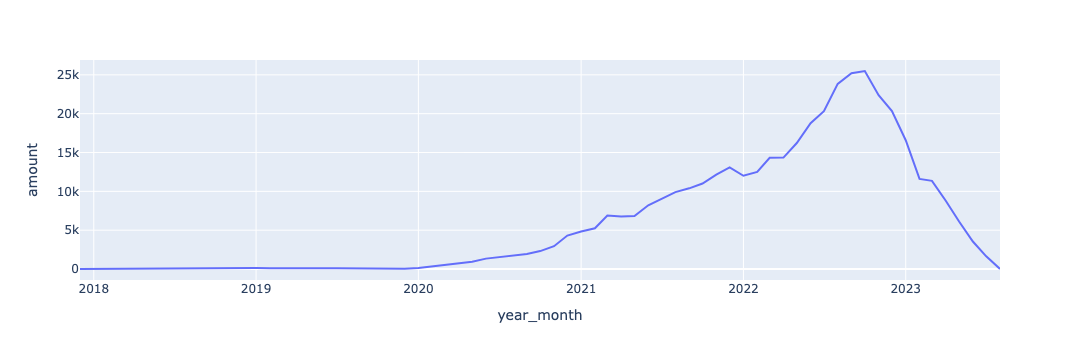

In [111]:
count_date_fig = px.line(count_date, x = 'year_month', y = 'amount')
count_date_fig.show()

In [117]:
in_train_df

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category,year_month
0,0,acc_0,PAYCHECK,2477.02,2022-03-18,PAYCHECK,2022-03-01
1,0,acc_0,EXTERNAL_TRANSFER,100.00,2022-10-25,EXTERNAL_TRANSFER,2022-10-01
2,0,acc_0,MISCELLANEOUS,6.29,2022-08-26,MISCELLANEOUS,2022-08-01
3,0,acc_0,EXTERNAL_TRANSFER,277.00,2022-06-03,EXTERNAL_TRANSFER,2022-06-01
4,0,acc_0,EXTERNAL_TRANSFER,100.00,2022-07-29,EXTERNAL_TRANSFER,2022-07-01
...,...,...,...,...,...,...,...
513110,5941,acc_9524,EXTERNAL_TRANSFER,8.66,2023-01-21,EXTERNAL_TRANSFER,2023-01-01
513111,5941,acc_9524,EXTERNAL_TRANSFER,267.13,2023-01-23,EXTERNAL_TRANSFER,2023-01-01
513112,5941,acc_9524,EXTERNAL_TRANSFER,2.00,2023-01-24,EXTERNAL_TRANSFER,2023-01-01
513113,5941,acc_9524,EXTERNAL_TRANSFER,207.16,2023-01-24,EXTERNAL_TRANSFER,2023-01-01


In [121]:
# Mean + STD intervals between inflows by consumer
inflows = in_train_df.sort_values(['prism_consumer_id','posted_date'])
inflows['days_since_last'] = inflows.groupby('prism_consumer_id')['posted_date'].diff().dt.days
regularity_stats = inflows.groupby('prism_consumer_id')['days_since_last'].agg(['mean','std'])
regularity_stats

,mean,std
prism_consumer_id,,
0,3.933333,3.844740
2,3.214286,2.823417
7,2.734375,3.514838
9,2.689840,15.069635
11,2.187500,2.945061
...,...,...
5926,39.384615,58.423081
5927,5.000000,4.398211
5929,7.681319,6.928009


In [122]:
regularity_stats['mean'].mean()

3.0335419559616543

In [150]:
iqr = regularity_stats['mean'].quantile(0.75) - regularity_stats['mean'].quantile(0.25)
high_end = regularity_stats['mean'].quantile(0.75) + 1.5 * iqr
low_end = regularity_stats['mean'].quantile(0.25) - 1.5 * iqr # negative number, everything will be above lower bound
regularity_stats['irregular_income'] = regularity_stats['mean'] > high_end
regularity_stats

,mean,std,irregular_income
prism_consumer_id,,,
0,3.933333,3.844740,False
2,3.214286,2.823417,False
7,2.734375,3.514838,False
9,2.689840,15.069635,False
11,2.187500,2.945061,False
...,...,...,...
5926,39.384615,58.423081,True
5927,5.000000,4.398211,False
5929,7.681319,6.928009,True


(array([ 41., 222., 388., 411., 365., 261., 244., 182., 135., 130.]),
 array([0.21051893, 0.28946704, 0.36841514, 0.44736325, 0.52631136,
        0.60525946, 0.68420757, 0.76315568, 0.84210379, 0.92105189,
        1.        ]),
 <BarContainer object of 10 artists>)

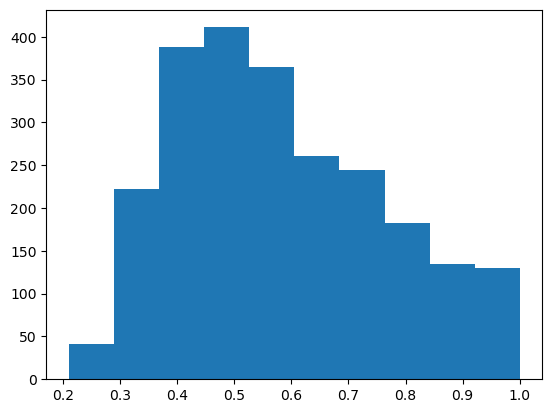

In [135]:
# Number of unique inflow sources (by category)
num_income_sources = in_train_df.groupby('prism_consumer_id')['category'].nunique().rename('num_income_sources')

# Proportion of inflow from top source
top_source_prop = (
    in_train_df
    .groupby(['prism_consumer_id','category'])['amount'].sum()
    .groupby(level=0)
    .apply(lambda x: x.max()/x.sum())
    .rename('top_source_prop')
)
# top_source_prop
plt.hist(top_source_prop)

* For many consumers, their largest income source contributes 40-60% of their total inflows.
  * There is moderate income concentration -- not all income comes from a single source but the top source is still very significant
* There are few consumers with a very high concentration (0.9-1.0)
  * Only a small group relies on a single source of income.
* There are very few consumers where their largest inflow is less than 30% of all their income
  * Most people don't have very diversified sources of income. 